<a href="https://colab.research.google.com/github/karishma-2020/Assignment-Reminder-Bot-Telegram/blob/main/GithubFLikrCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THIS IS README WALA

In [ ]:
!apt-get install python3-distutils
!apt-get install python3-distutils-extra

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-distutils is already the newest version (3.10.8-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  gettext gettext-base intltool libauthen-sasl-perl libclone-perl libdata-dump-perl
  libencode-locale-perl libfile-listing-perl libfont-afm-perl libhtml-form-perl libhtml-format-perl
  libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl libhttp-cookies-perl
  libhttp-daemon-perl libhttp-date-perl libhttp-message-perl libhttp-negotiate-perl libio-html-perl
  libio-socket-ssl-perl liblwp-mediatypes-perl liblwp-protocol-https-perl libmailtools-perl
  libnet-http-perl libnet-smtp-ssl-perl libnet-ssleay-perl libtry-tiny-perl liburi-perl libwww-perl
  libwww-robotrules-perl libxml-parser-perl netbase perl-openssl-d

In [ ]:
!pip3 install tensorflow

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# from keras.backend.tensorflow_backend import set_session
from tensorflow.keras import backend as K
# import keras

import sys, time, os, warnings
import numpy as np
import pandas as pd
from collections import Counter

In [ ]:
warnings.filterwarnings("ignore")
# print("python {}".format(sys.version))
# print("keras version {}".format(tensorflow.keras.__version__)); del tensorflow.keras
# print("tensorflow version {}".format(tf.__version__))

## Configuring the GPU memory to be used for training purposes - ignore?

In [ ]:
# # config = tf.ConfigProto()
# config = tf.compat.v1.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.95 #Using 95% of the available memory of the GPU
# config.gpu_options.visible_device_list = "0"
# # set_session(tf.Session(config=config))
# session = tf.compat.v1.Session(config=config)
# K.set_session(session)

def set_seed(sd=144):
    from numpy.random import seed
    from tensorflow import set_random_seed
    import random as rn
    ## numpy random seed
    seed(sd)
    ## core python's random number
    rn.seed(sd)
    ## tensor flow's random number
    set_random_seed(sd)

## Importing the image dataset and its respective captions

In [ ]:
# ## The location of the Flickr8K_ images
# dir_Flickr_jpg = "Data/Flickr8k_Dataset/"
# ## The location of the caption file
# dir_Flickr_text = "Data/Flickr8k.token.txt"

# jpgs = os.listdir(dir_Flickr_jpg)
# print("The number of jpg flies in Flicker8k: {}".format(len(jpgs)))
# dir_Flickr_text = "Data/Flickr8k.token.txt"



import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-small")

['myntradataset', 'images']
/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1/images


In [ ]:
folders = [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]
print(folders)
pathf = path + "/" + "images"
print(pathf)

['myntradataset', 'images']
/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1/images


In [ ]:
dir_Flickr_text = "/content/1-1500 roughly.csv"

images = os.listdir(pathf)
print(images[:5])

caption_data = pd.read_csv(dir_Flickr_text)
caption_data.head()

['33513.jpg', '20109.jpg', '11437.jpg', '20460.jpg', '12073.jpg']


Image                                            Caption
0  32247.jpg  The product showcased in the image is a Women'...
1  12942.jpg  The product in the image is a "Basics Men Blue...
2  48882.jpg  The Lucera Women Silver Pendant with Chain is ...
3  18859.jpg  The product in the image is a men's polo t-shi...
4   6069.jpg  The product in the image is the UCB Women's Yo...

In [ ]:
# Finding the captions for each image.
# file = open(dir_Flickr_text,'r', encoding='utf8')
# text = file.read()
# file.close()


# datatxt = []
# for line in text.split('\n'):
#     col = line.split('\t')
#     if len(col) == 1:
#         continue
#     w = col[0].split("#") # Splitting the caption dataset at the required position
#     datatxt.append(w + [col[1].lower()])

# df_txt = pd.DataFrame(datatxt,columns=["filename","index","caption"])


# uni_filenames = np.unique(df_txt.filename.values)
# print("The number of unique file names : {}".format(len(uni_filenames)))
# print("The distribution of the number of captions for each image:")
# Counter(Counter(df_txt.filename.values).values())
# print(df_txt[:5])

The number of unique file names : 0
The distribution of the number of captions for each image:
Empty DataFrame
Columns: [filename, index, caption]
Index: []


## Plotting few images and their captions from the dataset

The product showcased in the image is a Women's Printed Green Patiala, which falls under the Apparel category, specifically Bottomwear. This particular item, identified as ID 32247, is designed for women and has a distinct ethnic usage. The base color of the Patiala is green, and it features a pattern that adds to its aesthetic appeal. The Patiala is part of Fabindia's collection and was introduced in the summer season of 2012. The product is meant to be a fashionable and culturally relevant piece for women looking to add a traditional touch to their wardrobe.


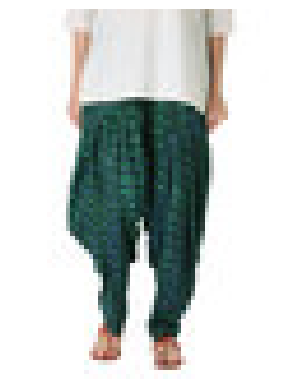

The product in the image is a "Basics Men Blue Slim Fit Striped Shirt," which is part of the apparel category, specifically topwear. This shirt is designed for men and is intended for casual use. The base color of the shirt is blue, and it features a striped pattern that adds to its visual appeal. The year of production for this shirt is 2011, and it is suitable for the Fall season. The key features of this shirt include its slim fit design, which is tailored to fit the body snugly, providing a modern and sleek look. The stripes add a touch of classic style while the blue color offers versatility in creating outfits. Overall, this shirt is a versatile piece that can be easily incorporated into a man's wardrobe for casual occasions.


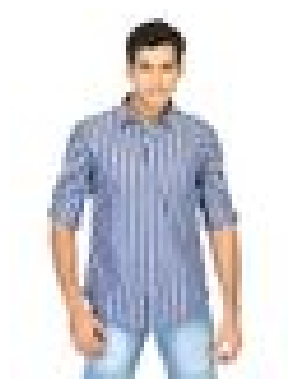

The Lucera Women Silver Pendant with Chain is a piece of jewelry designed for women that exudes a sense of elegance and simplicity. The pendant, crafted in silver, features a rectangular design that elegantly dangles from the chain, adding a touch of sophistication to any outfit. Its casual style makes it versatile for everyday wear, while its timeless design allows it to complement various fashion choices. This accessory is perfect for fall seasons and has been available since 2012, making it a contemporary yet classic addition to one's jewelry collection.


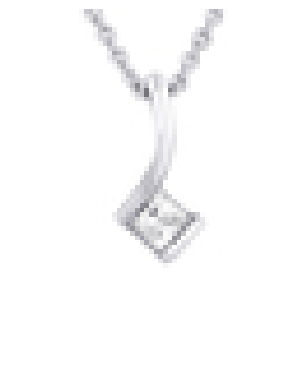

The product in the image is a men's polo t-shirt from the Puma brand, specifically designed for casual wear. The t-shirt's base color is black, which is a versatile choice for fall season apparel. The year of design for this particular style was 2011. This t-shirt features a collar with a two-tone pattern, combining black and grey, adding a subtle contrast to the otherwise monochromatic garment. The key benefits of this t-shirt would include its comfort for casual use, the stylish design that allows for easy pairing with other clothing items, and the brand's reputation for quality in sportswear, suggesting durability and a fashionable edge.


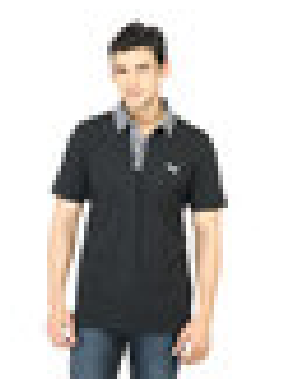

The product in the image is the UCB Women's Young Pigment Pink T-shirt, designed for women and categorized as a topwear item. This summer collection piece from the year 2011 is made for casual wear. The t-shirt features a pink base color, which is highlighted by the word "Young" printed on it. The t-shirt's key features include its vibrant color, suitable for warm weather, and its casual style, making it an ideal choice for everyday wear. The focus of this description is to emphasize the product's appeal through its design and intended use.


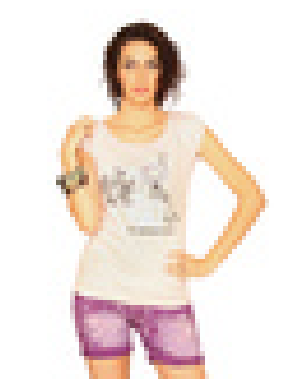

The product in the image is a pair of Carlton London Women Cream Shoes, designed for women and suitable for casual use. These shoes are part of the Footwear category, specifically within the subcategory of Shoes. The base color of these shoes is cream, which is a versatile choice that complements many spring wardrobes. The year of production for this item is 2013. The key features of these shoes include their stylish design, which is likely to appeal to those looking for fashionable yet comfortable footwear. The benefits of these shoes would be their ease of pairing with various outfits and their suitability for informal settings. The focus should remain on the product's design and functionality, without any reference to the background or surroundings, as per the provided information.


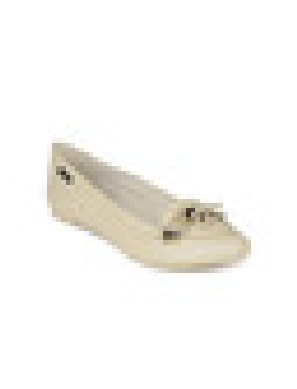

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for index, row in caption_data.iterrows():
    if index > 5:
      break

    # print(row["Image"], row["Caption"])

    filename = pathf + "/" + row["Image"]
    # print(filename)
    caption = row["Caption"]
    print(caption)
    image_load = load_img(filename)

    img = mpimg.imread(filename)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## Cleaning captions for further analysis

In [ ]:
# Defining a function to calculate the top 3 words in all the captions available for the images
def df_word(caption_data):
    vocabulary = []
    for txt in caption_data["Caption"]:
        vocabulary.extend(txt.split())
    print('Vocabulary Size: %d' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    dfword = pd.DataFrame({"word":list(ct.keys()),"count":list(ct.values())})
    dfword = dfword.sort_values("count",ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)

dfword = df_word(caption_data)
dfword.head(3)

Vocabulary Size: 5297


word  count
0  the   5544
1    a   4846
2  The   4502

## Cleaning the captions for further processing
The caption dataset contains punctuations, singular words and numerical values that need to be cleaned before it is fed to the model because uncleaned dataset will not create good captionsfor the images

In [ ]:
import string
text_original = "I ate 1000 apples and a banana. I have python v2.7. It's 2:30 pm. Could you buy me iphone7?"

print(text_original)
print("\nRemove punctuations..")
def remove_punctuation(text_original):
    text_no_punctuation = text_original.translate(str.maketrans('','',string.punctuation))
    return(text_no_punctuation)
text_no_punctuation = remove_punctuation(text_original)
print(text_no_punctuation)


print("\nRemove a single character word..")
def remove_single_character(text):
    text_len_more_than1 = ""
    for word in text.split():
        if len(word) > 2:
            text_len_more_than1 += " " + word
    return(text_len_more_than1)
text_len_more_than1 = remove_single_character(text_no_punctuation)
print(text_len_more_than1)

# print("\nRemove words with numeric values..")
# def remove_numeric(text,printTF=False):
#     text_no_numeric = ""
#     for word in text.split():
#         isalpha = word.isalpha()
#         if printTF:
#             print("    {:10} : {:}".format(word,isalpha))
#         if isalpha:
#             text_no_numeric += " " + word
#     return(text_no_numeric)
# text_no_numeric = remove_numeric(text_len_more_than1,printTF=True)
# print(text_no_numeric)

I ate 1000 apples and a banana. I have python v2.7. It's 2:30 pm. Could you buy me iphone7?

Remove punctuations..
I ate 1000 apples and a banana I have python v27 Its 230 pm Could you buy me iphone7

Remove a single character word..
 ate 1000 apples and banana have python v27 Its 230 pm Could you buy me iphone7

Remove words with numeric values..
    ate        : True
    1000       : False
    apples     : True
    and        : True
    banana     : True
    have       : True
    python     : True
    v27        : False
    Its        : True
    230        : False
    pm         : True
    Could      : True
    you        : True
    buy        : True
    me         : True
    iphone7    : False
 ate apples and banana have python Its pm Could you buy me


In [ ]:
def text_clean(text_original):
    text = remove_punctuation(text_original)
    text = remove_single_character(text)
    text = remove_numeric(text)
    return(text)


for i, caption in enumerate(caption_data["Caption"]):
    newcaption = text_clean(caption)
    caption_data["Caption"].iloc[i] = newcaption

## Plotting the top 50 words that appear in the cleaned dataset

Vocabulary Size: 3492


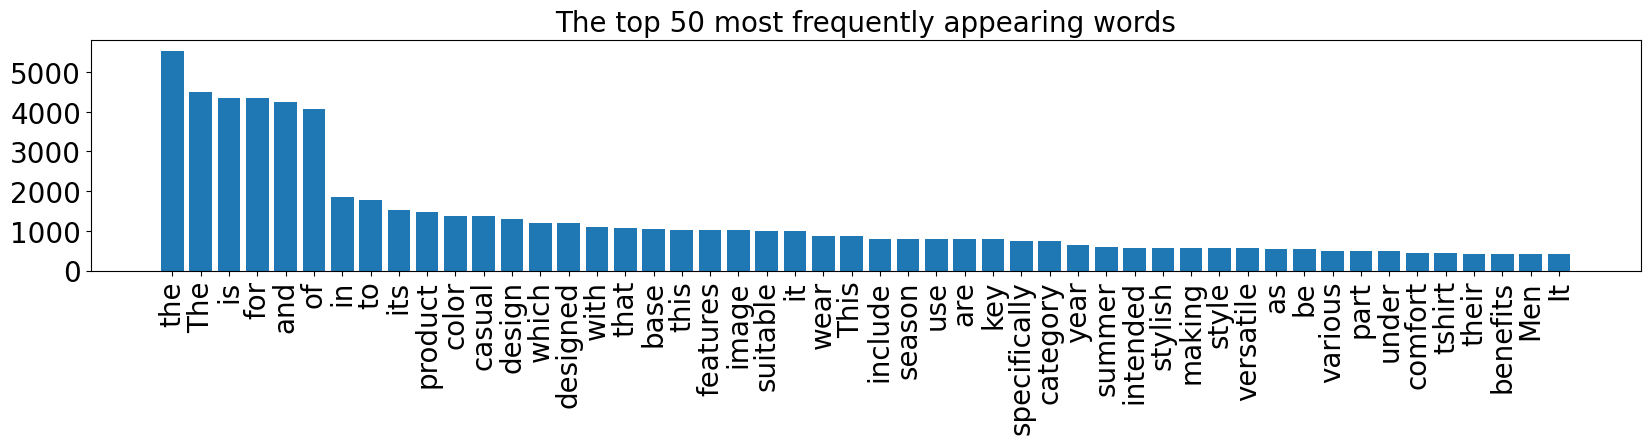

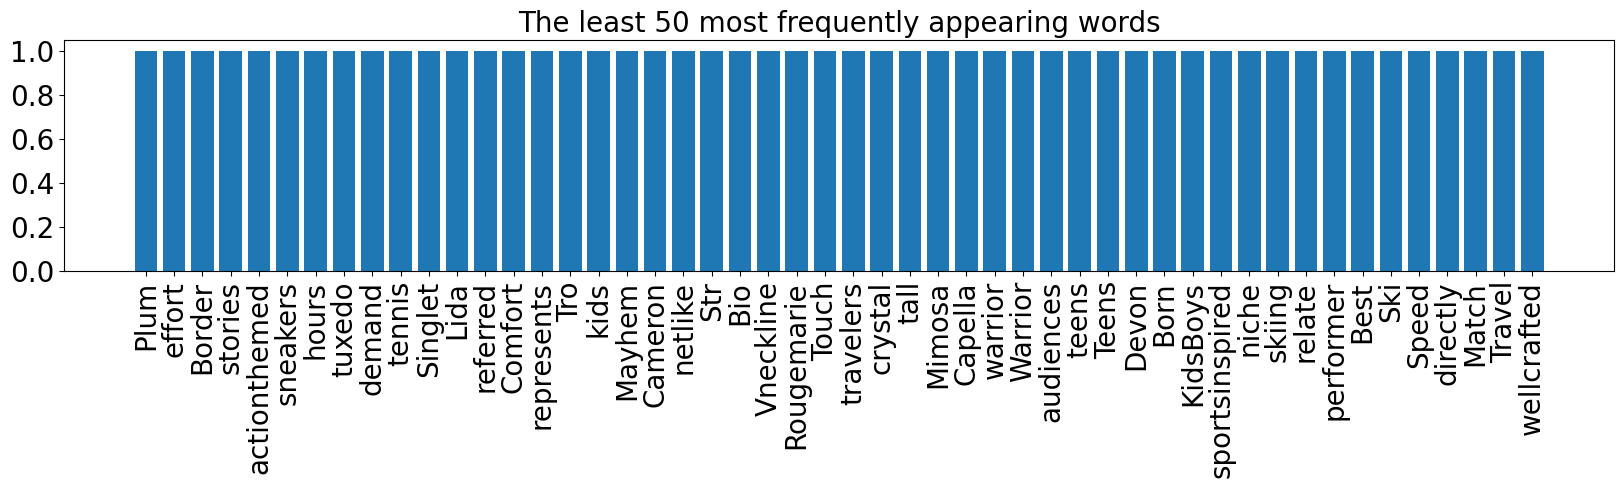

In [ ]:
topn = 50

def plthist(dfsub, title="The top 50 most frequently appearing words"):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

dfword = df_word(caption_data)
plthist(dfword.iloc[:topn,:],
        title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 50 most frequently appearing words")

## Adding start and end sequence tokens for each captions
Start and end sequence has to be added to the tokens so that it is easier to identify the captions for the images as each of them are of different length


In [ ]:
from copy import copy
def add_start_end_seq_token(txt):
    return 'startseq ' + txt + ' endseq'

for i, caption in enumerate(caption_data["Caption"]):
      newcaption = add_start_end_seq_token(caption)
      caption_data["Caption"].iloc[i] = newcaption

In [ ]:
caption_data[:5]

Image                                            Caption
0  32247.jpg  startseq  The product showcased in the image i...
1  12942.jpg  startseq  The product in the image is Basics M...
2  48882.jpg  startseq  The Lucera Women Silver Pendant with...
3  18859.jpg  startseq  The product in the image is mens pol...
4   6069.jpg  startseq  The product in the image is the UCB ...

## Loading VGG16 model and weights to extract features from the images
The pre-trained weights for the VGG-16 model can be downloaded from here.


In [ ]:
from keras.applications import VGG16

modelvgg = VGG16(include_top=True, weights="imagenet")

# modelvgg = VGG16(include_top=True,weights=None)
## load the locally saved weights
# modelvgg.load_weights("Data/vgg16_weights_tf_dim_ordering_tf_kernels.h5")
modelvgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

## Deleting the last layer of the model
The last layer of the VGG-16 is excluded here because we are are just using it for extracting the features rather than using for object classification.



In [ ]:
from keras import models
modelvgg.layers.pop()
modelvgg = models.Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-1].output)
## show the deep learning model
modelvgg.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

## Feature extraction
Here the features are extracted from all the images in the dataset. VGG-16 model gives out 4096 features from the input image of size 224 * 224



In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict

images_dict = OrderedDict()
npix = 224 #image size is fixed at 224 because VGG16 model has been pre-trained to take that size.
target_size = (npix,npix, 3)
data = np.zeros((len(images),npix,npix,3))
for i, name in enumerate(images):
    # if i < 5:
      # print(i, name)
    # load an image from file
    filename = pathf + '/' + name
    image = load_img(filename, target_size=target_size)
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    nimage = preprocess_input(image)

    y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3]))
    images_dict[name] = y_pred.flatten()

# print(images_dict)

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
flag = 5
for key in images_dict.keys():
  if flag == 0:
    break
  print(images_dict[key])
  flag -= 1

[6.36766708e-05 3.78994824e-04 3.53441792e-05 3.38850441e-05
 1.85881836e-05 3.74693365e-04 8.06572280e-06 8.92041789e-05
 3.14022982e-05 5.71872042e-05 7.41661934e-05 2.33311985e-05
 2.04234020e-05 2.76803366e-05 5.58179709e-05 4.87789002e-05
 7.80960836e-05 1.68099359e-04 7.70681072e-05 1.24084007e-04
 1.19074803e-05 6.99288445e-04 6.78036740e-05 2.59906257e-04
 1.34049071e-04 1.55727600e-03 1.34624238e-03 2.81666551e-04
 1.21431518e-03 5.74213736e-05 5.65890468e-06 1.11615554e-05
 9.67224187e-05 3.14164354e-05 1.29031192e-04 1.69566247e-05
 1.09039029e-04 6.99548546e-05 7.65978033e-03 1.33036971e-04
 2.39549227e-05 4.92114574e-04 4.68683313e-04 5.17150329e-04
 7.58703449e-04 2.07160995e-03 1.27554813e-04 1.37167773e-03
 2.98808682e-05 7.98997935e-05 2.03399279e-04 4.01974516e-03
 3.10765085e-04 5.47416741e-04 9.30506270e-04 3.71757815e-05
 1.99800543e-03 2.12728060e-04 2.04014927e-04 1.53290312e-04
 8.17627413e-04 1.05812986e-04 3.94299801e-04 3.98988399e-04
 4.54603432e-04 6.515139

## Plotting similar images from the dataset
For this we have to first create a cluster and find which images belong together. Hence PCA is used to reduce the dimensions of the features which we got from VGG-16 festure extraction from 4096 to 2

First the clusters are plotted and few examples are taken from the bunch for displaying


In [ ]:
from sklearn.decomposition import PCA

encoder = np.array(list(images_dict.values()))
#print(encoder)
pca = PCA(n_components = 2)
#print(pca)
y_pca = pca.fit_transform(encoder)

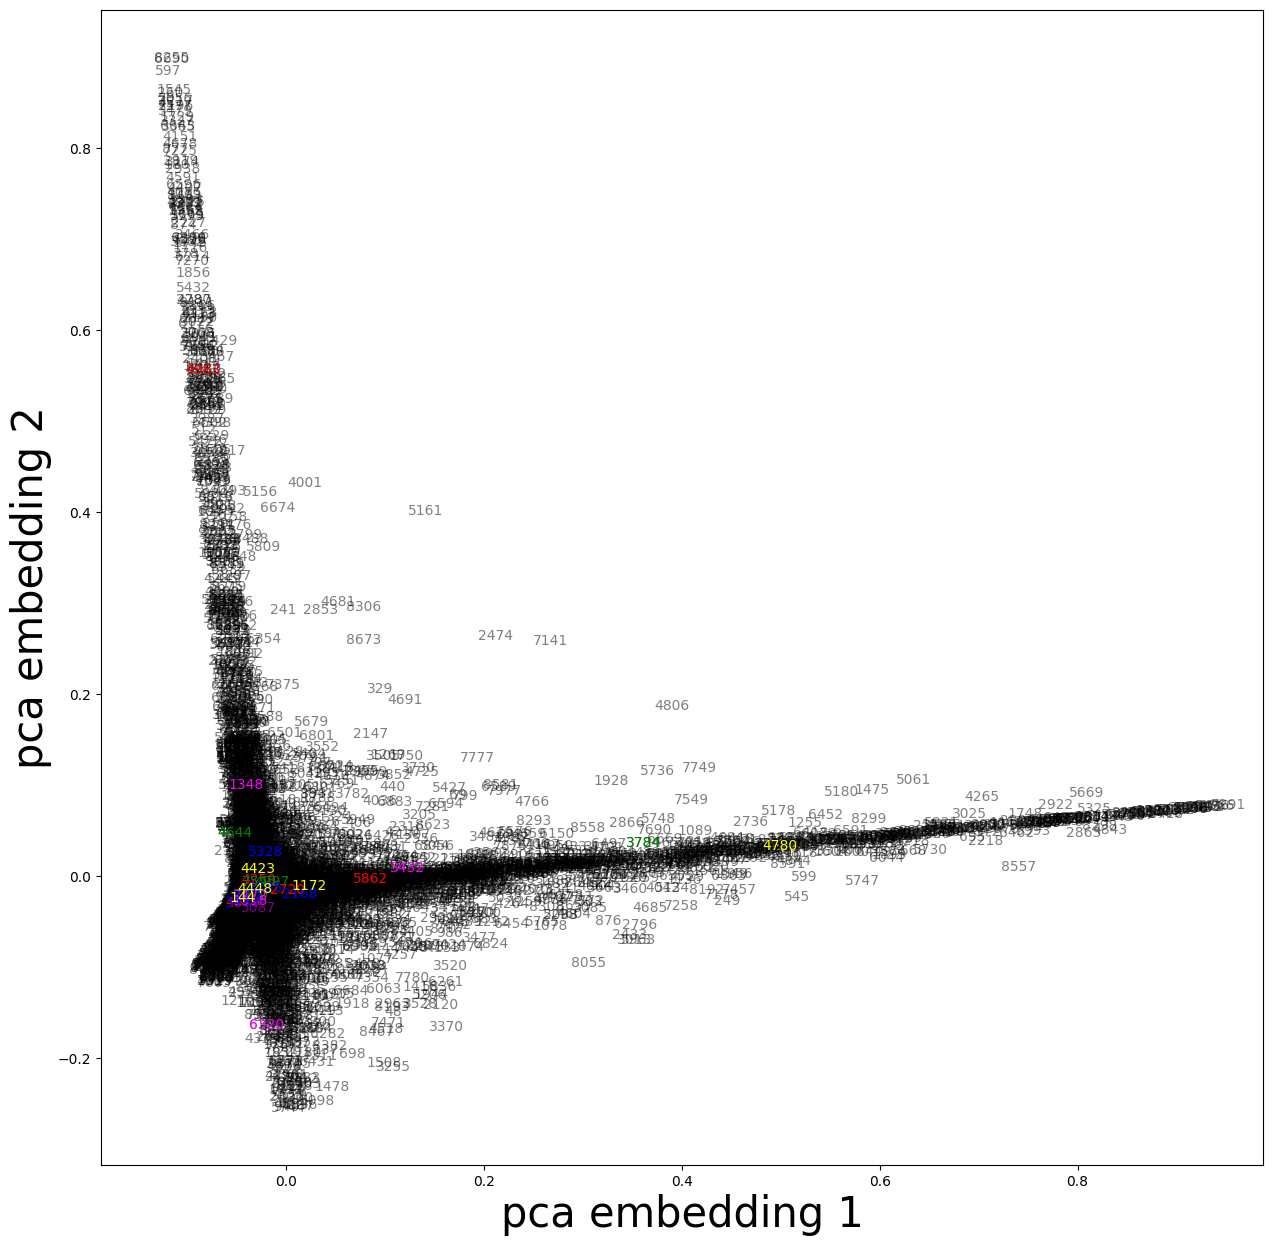

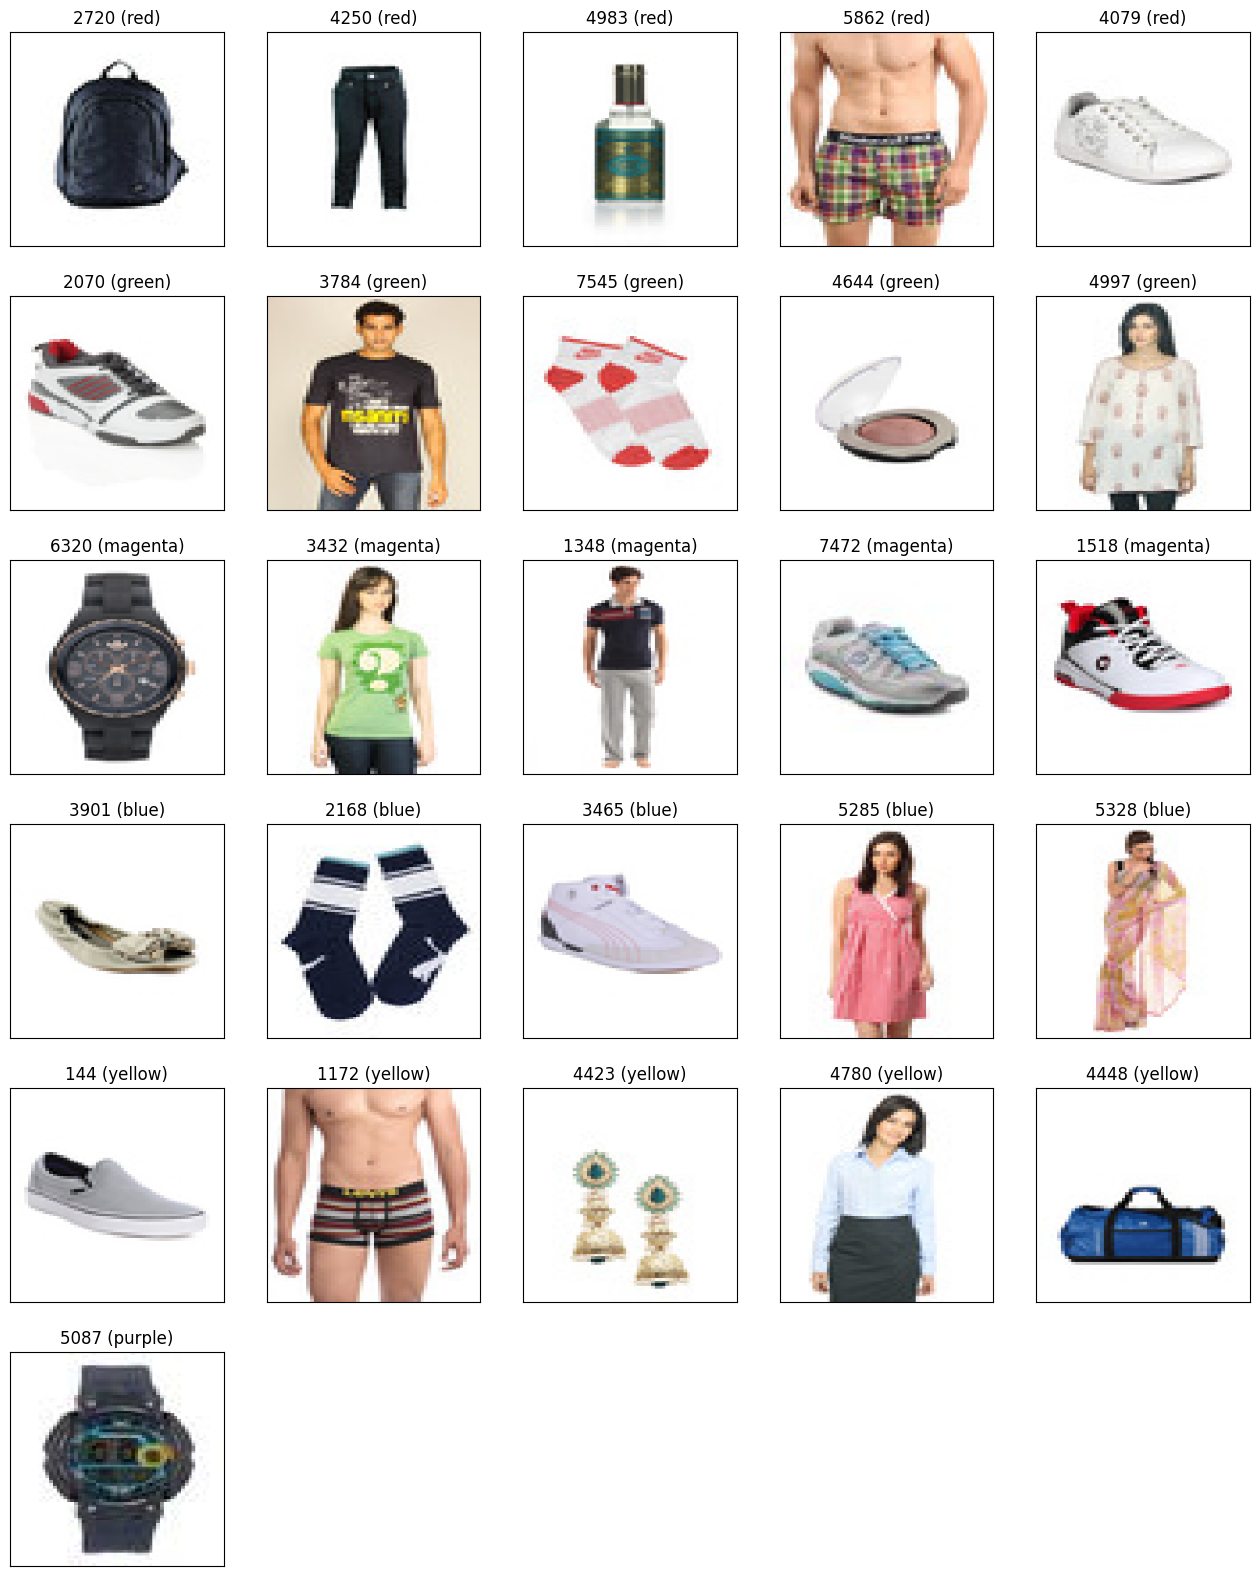

In [ ]:
## some selected pictures that are creating clusters
#these are just to display the related images from the dataset
picked_pic = OrderedDict()
picked_pic["red"]     = [2720,4250,4983,5862,4079]
picked_pic["green"]   = [2070,3784,7545,4644, 4997]
picked_pic["magenta"] = [6320,3432,1348,7472, 1518]
picked_pic["blue"]    = [3901,2168,3465,5285,5328]
picked_pic["yellow"]  = [144,1172,4423,4780,4448]
picked_pic["purple"]  = [5087]

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(y_pca[:,0],y_pca[:,1],c="white")

for irow in range(y_pca.shape[0]):
    ax.annotate(irow,y_pca[irow,:],color="black",alpha=0.5) #annotate() is used to place text at the location of the point
for color, irows in picked_pic.items():
    for irow in irows:
        ax.annotate(irow,y_pca[irow,:],color=color)
ax.set_xlabel("pca embedding 1",fontsize=30)
ax.set_ylabel("pca embedding 2",fontsize=30)
plt.show()


## plot of images
fig = plt.figure(figsize=(16,20))
count = 1
for color, irows in picked_pic.items():
    for ivec in irows:
        name = images[ivec]
        filename = pathf + '/' + name
        image = load_img(filename, target_size=target_size)

        ax = fig.add_subplot(len(picked_pic),5,count,
                         xticks=[],yticks=[])
        count += 1
        plt.imshow(image)
        plt.title("{} ({})".format(ivec,color))
plt.show()

## Merging the images and the captions for training

In [ ]:
dimages, keepindex = [],[]
# Creating a datframe where only first caption is taken for processing
# caption_data_1 = caption_data.loc[caption_data["index"].values == "0",: ]
for i, fnm in enumerate(caption_data["Image"]):
    if fnm in images_dict.keys():
        dimages.append(images_dict[fnm])
        keepindex.append(i)

#fnames are the names of the image files
fnames = caption_data["Image"].iloc[keepindex].values
#dcaptions are the captions of the images
dcaptions = caption_data["Caption"].iloc[keepindex].values
#dimages are the actual features of the images
dimages = np.array(dimages)

In [ ]:
caption_data[:5]

Image                                            Caption
0  32247.jpg  startseq  The product showcased in the image i...
1  12942.jpg  startseq  The product in the image is Basics M...
2  48882.jpg  startseq  The Lucera Women Silver Pendant with...
3  18859.jpg  startseq  The product in the image is mens pol...
4   6069.jpg  startseq  The product in the image is the UCB ...

## Tokenizing the captions for further processing
As the model can't take texts as an input, they need to converted into vectors.



In [ ]:
# from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

## the maximum number of words in dictionary
nb_words = 6000
tokenizer = Tokenizer(nb_words=nb_words)
tokenizer.fit_on_texts(dcaptions)
vocab_size = len(tokenizer.word_index) + 1
print("vocabulary size : {}".format(vocab_size))
dtexts = tokenizer.texts_to_sequences(dcaptions)
print(dtexts[:5])

vocabulary size : 1480
[[18, 1, 10, 6, 1, 21, 2, 551, 33, 57, 471, 77, 253, 75, 15, 2, 48, 5, 1, 46, 30, 31, 76, 7, 75, 2, 16, 4, 33, 3, 2, 42, 4, 13, 25, 1, 22, 11, 5, 1, 75, 2, 57, 3, 12, 23, 253, 137, 20, 73, 9, 8, 182, 62, 1, 36, 5, 147, 4, 7, 75, 2, 3, 12, 2, 24, 4, 1, 65, 28, 1, 27, 23, 5, 7, 75, 29, 8, 471, 77, 14, 15, 2, 310, 9, 77, 1, 415, 908, 148, 158, 3, 173, 78, 1, 273, 138, 82, 5, 79, 49, 98, 1, 57, 11, 187, 111, 6, 669, 101, 202, 7, 75, 2, 43, 74, 20, 80, 38, 157, 909, 670, 274, 159, 4, 13, 69, 19], [18, 1, 10, 6, 1, 21, 2, 64, 325, 44, 51, 1, 211, 81, 31, 16, 4, 13, 26, 1, 203, 22, 11, 2, 47, 15, 2, 43, 87, 4, 65, 28, 46, 1, 36, 5, 14, 4, 7, 89, 49, 52, 7, 44, 23, 472, 17, 671, 137, 416, 47, 3, 104, 212, 473, 326, 9, 1, 417, 910, 102, 1, 27, 50, 5, 7, 44, 85, 29, 8, 53, 4, 13, 25, 1, 39, 14, 20, 418, 4, 275, 419, 17, 188, 189, 242, 3, 1, 311, 672, 4, 254, 6, 474, 183, 194, 3, 90, 475, 19], [18, 1, 673, 35, 66, 162, 124, 2, 39, 70, 16, 4, 35, 149, 4, 13, 25, 1, 353, 66, 

## Splitting the training and test data

In [ ]:
prop_test, prop_val = 0.2, 0.2

N = len(dtexts)
Ntest, Nval = int(N*prop_test), int(N*prop_val)

def split_test_val_train(dtexts,Ntest,Nval):
    return(dtexts[:Ntest],
           dtexts[Ntest:Ntest+Nval],
           dtexts[Ntest+Nval:])

dt_test,  dt_val, dt_train   = split_test_val_train(dtexts,Ntest,Nval)
di_test,  di_val, di_train   = split_test_val_train(dimages,Ntest,Nval)
fnm_test,fnm_val, fnm_train  = split_test_val_train(fnames,Ntest,Nval)

## Finding the max length of the caption

In [ ]:
maxlen = np.max([len(text) for text in dtexts])
print(maxlen)

190


## Processing the captions and images as per the required shape by the model

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

def preprocessing(dtexts,dimages):
    N = len(dtexts)
    print("# captions/images = {}".format(N))

    assert(N==len(dimages)) # using assert to make sure that length of images and captions are always similar
    Xtext, Ximage, ytext = [],[],[]
    for text,image in zip(dtexts,dimages):
        # zip() is used to create a tuple of iteratable items
        for i in range(1,len(text)):
            in_text, out_text = text[:i], text[i]
            in_text = pad_sequences([in_text],maxlen=maxlen).flatten()# using pad sequence to make the length of all captions equal
            out_text = to_categorical(out_text,num_classes = vocab_size) # using to_categorical to


            Xtext.append(in_text)
            Ximage.append(image)
            ytext.append(out_text)

    Xtext  = np.array(Xtext)
    Ximage = np.array(Ximage)
    ytext  = np.array(ytext)
    print(" {} {} {}".format(Xtext.shape,Ximage.shape,ytext.shape))
    return(Xtext,Ximage,ytext)


Xtext_train, Ximage_train, ytext_train = preprocessing(dt_train,di_train)
Xtext_val,   Ximage_val,   ytext_val   = preprocessing(dt_val,di_val)
# pre-processing is not necessary for testing data
#Xtext_test,  Ximage_test,  ytext_test  = preprocessing(dt_test,di_test)

# captions/images = 140
 (14462, 190) (14462, 1000) (14462, 1480)
# captions/images = 46
 (4499, 190) (4499, 1000) (4499, 1480)


## Building the LSTM model

In [ ]:
# from keras import layers
# from keras.layers import Input, Flatten, Dropout, Activation
# from keras.layers.advanced_activations import LeakyReLU, PReLU
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, LeakyReLU, PReLU  # No need for advanced_activations

print(vocab_size)
## image feature

dim_embedding = 64

input_image = layers.Input(shape=(Ximage_train.shape[1],))
fimage = layers.Dense(256,activation='relu',name="ImageFeature")(input_image)
## sequence model
input_txt = layers.Input(shape=(maxlen,))
ftxt = layers.Embedding(vocab_size,dim_embedding, mask_zero=True)(input_txt)
ftxt = layers.LSTM(256,name="CaptionFeature",return_sequences=True)(ftxt)
#,return_sequences=True
#,activation='relu'
se2 = Dropout(0.04)(ftxt)
ftxt = layers.LSTM(256,name="CaptionFeature2")(se2)
## combined model for decoder
decoder = layers.add([ftxt,fimage])
decoder = layers.Dense(256,activation='relu')(decoder)
output = layers.Dense(vocab_size,activation='softmax')(decoder)
model = models.Model(inputs=[input_image, input_txt],outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam')

print(model.summary())

1480


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 190)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 190, 64)        │         94,720 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 190)            │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ CaptionFeature (LSTM)     │ (None, 190, 256)       │        328,704 │ embedding[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 190, 256)       │              0 │ CaptionFeature[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 1000)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ CaptionFeature2 (LSTM)    │ (None, 256)            │        525,312 │ dropout[0][0],         │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ImageFeature (Dense)      │ (None, 256)            │        256,256 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 256)            │              0 │ CaptionFeature2[0][0], │
│                           │                        │                │ ImageFeature[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │         65,792 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1480)           │        380,360 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,651,144 (6.30 MB)

 Trainable params: 1,651,144 (6.30 MB)

 Non-trainable params: 0 (0.00 B)

None


## Training the LSTM model

In [ ]:
# fit model
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
#start = time.time()
hist = model.fit([Ximage_train, Xtext_train], ytext_train,
                  epochs=6, verbose=2,
                  batch_size=32,
                  validation_data=([Ximage_val, Xtext_val], ytext_val),callbacks=[tensorboard])
#end = time.time()
#print("TIME TOOK {:3.2f}MIN".format((end - start )/60))

Epoch 1/6
452/452 - 893s - 2s/step - loss: 5.4282 - val_loss: 4.8637
Epoch 2/6
452/452 - 906s - 2s/step - loss: 4.5990 - val_loss: 4.4158
Epoch 3/6
452/452 - 876s - 2s/step - loss: 4.0770 - val_loss: 4.2202
Epoch 4/6
452/452 - 930s - 2s/step - loss: 3.7133 - val_loss: 4.0216
Epoch 5/6
452/452 - 892s - 2s/step - loss: 3.4044 - val_loss: 3.9114
Epoch 6/6
452/452 - 870s - 2s/step - loss: 3.1233 - val_loss: 3.8330


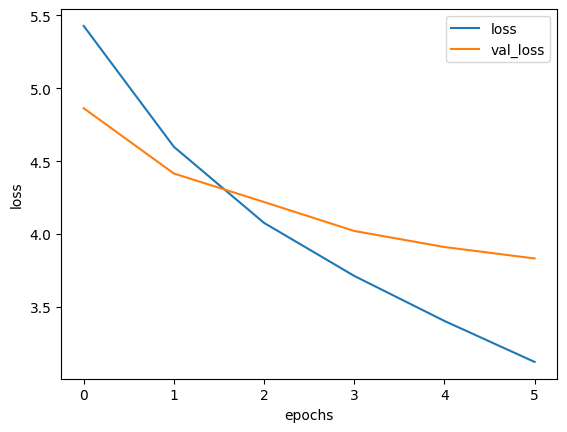

In [ ]:
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Generating captions on a small set of images
After the model finishes training we can test out its performance on the some of the test images to figure out if the generated captions are good enough. If the generated captions are good enough we can generate the captions for the whole test dataset.



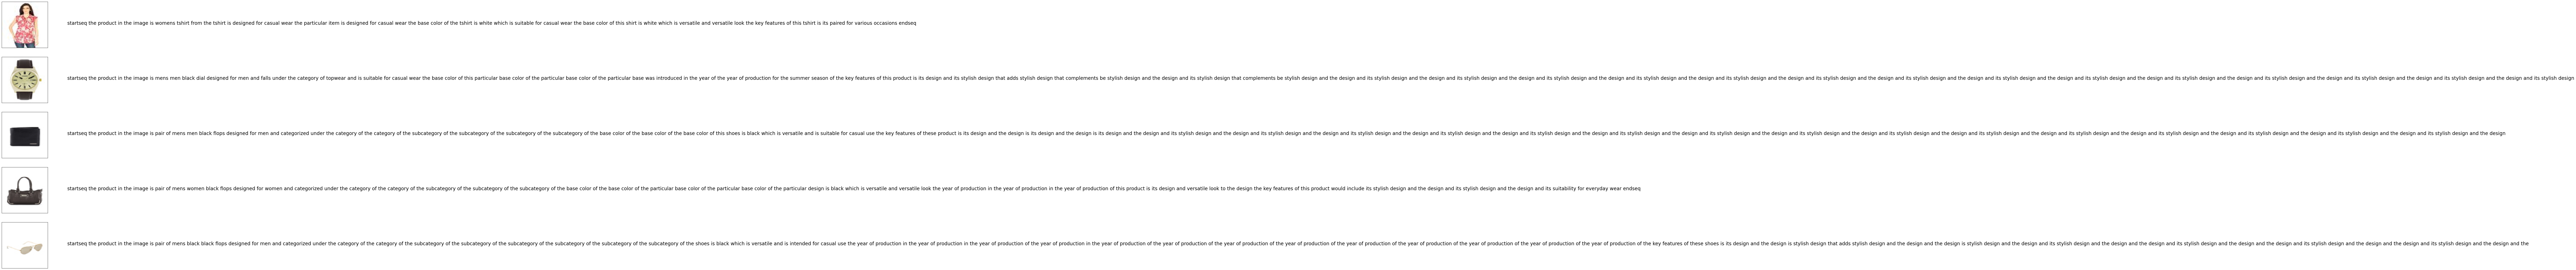

In [ ]:
index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])
def predict_caption(image):
    '''
    image.shape = (1,4462)
    '''

    in_text = 'startseq'

    for iword in range(maxlen):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence],maxlen)
        yhat = model.predict([image,sequence],verbose=0)
        yhat = np.argmax(yhat)
        newword = index_word[yhat]
        in_text += " " + newword
        if newword == "endseq":
            break
    return(in_text)



npic = 5
npix = 224
target_size = (npix,npix,3)

count = 1
fig = plt.figure(figsize=(10,20))
for jpgfnm, image_feature in zip(fnm_test[8:13],di_test[8:13]):
    ## images
    filename = pathf + '/' + jpgfnm
    image_load = load_img(filename, target_size=target_size)
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1

    ## captions
    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0,0.5,caption,fontsize=20)
    count += 1

plt.show()

## Generating captions for the whole test data and finding BLEU score

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])


nkeep = 5
pred_good, pred_bad, bleus = [], [], []
count = 0
for jpgfnm, image_feature, tokenized_text in zip(fnm_test,di_test,dt_test):
    count += 1
    if count % 200 == 0:
        print("  {:4.2f}% is done..".format(100*count/float(len(fnm_test))))

    caption_true = [ index_word[i] for i in tokenized_text ]
    caption_true = caption_true[1:-1] ## remove startreg, and endreg
    ## captions
    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    caption = caption.split()
    caption = caption[1:-1]## remove startreg, and endreg

    bleu = sentence_bleu([caption_true],caption)
    bleus.append(bleu)
    if bleu > 0.7 and len(pred_good) < nkeep:
        pred_good.append((bleu,jpgfnm,caption_true,caption))
    elif bleu < 0.3 and len(pred_bad) < nkeep:
        pred_bad.append((bleu,jpgfnm,caption_true,caption))

In [ ]:
print("Mean BLEU {:4.3f}".format(np.mean(bleus)))

Mean BLEU 0.084


## Good and bad captions examples from the model
We can check out some of the generated caption's quality. Some times due to the complex nature of the images the generated captions are not acceptable. Below you would find some examples



Bad Caption


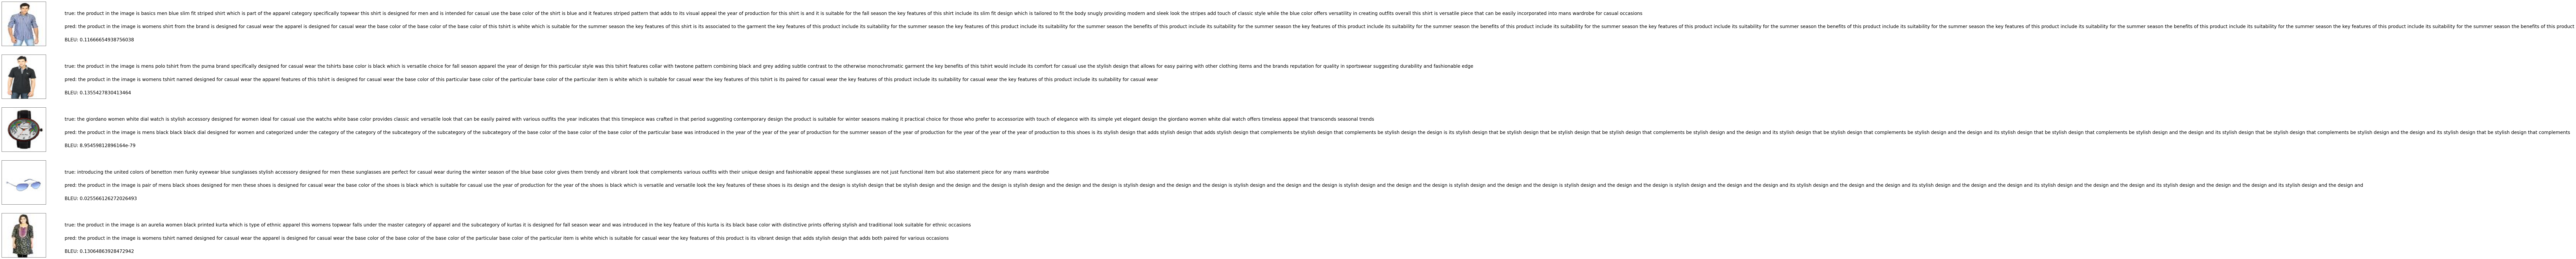

Good Caption


<Figure size 1000x2000 with 0 Axes>

In [ ]:
def plot_images(pred_bad):
    def create_str(caption_true):
        strue = ""
        for s in caption_true:
            strue += " " + s
        return(strue)

    npix = 224
    target_size = (npix, npix, 3)
    count = 1
    fig = plt.figure(figsize=(10,20))
    npic = len(pred_bad)
    for pb in pred_bad:
        bleu, jpgfnm, caption_true, caption = pb

        ## images
        filename = pathf + '/' + jpgfnm
        image_load = load_img(filename, target_size=target_size)
        ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        caption_true = create_str(caption_true)
        caption = create_str(caption)

        ax = fig.add_subplot(npic,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.text(0,0.7,"true:" + caption_true,fontsize=20)
        ax.text(0,0.4,"pred:" + caption,fontsize=20)
        ax.text(0,0.1,"BLEU: {}".format(bleu),fontsize=20)
        count += 1
    plt.show()

print("Bad Caption")
plot_images(pred_bad)
print("Good Caption")
plot_images(pred_good)